## GOLD PRICE PREDICTION USING RANDOM FOREST REGRESSOR

#### Data Overview: 
The data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

#### Model Building and Training: 
* This is a Regression dataset. We are building a model using Random Forest Regressor. 
* Model is first trained using training data 
* The model is further tested with sample test data and it will predict gold price for that specific value


In [2]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#Data collection and processing
gold_data = pd.read_csv(r"C:\Nirzari\Project\Regression\reg dataset\gold price prediction\gld_price_data.csv")

In [4]:
#print 1st 5 rows of data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting some info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#correlation
#positive correlation
#negative correlation
correlation = gold_data.corr()

### Heatmap to understand correlation

<AxesSubplot:>

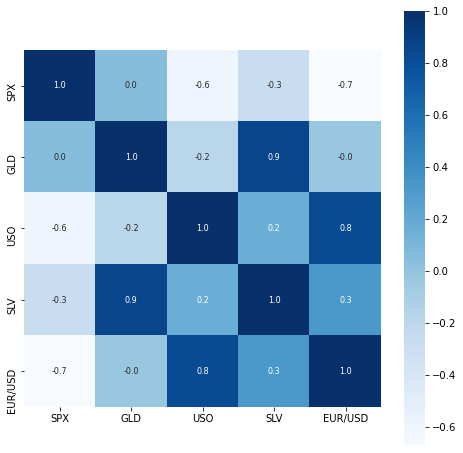

In [9]:
#constructing a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
 #correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#### CHECKING THE DISTRIBUTION OF THE GOLD PRICE

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

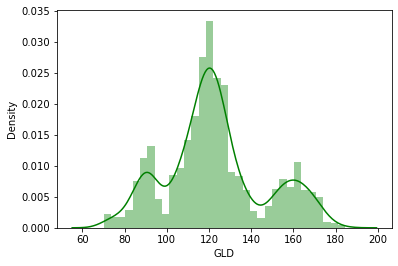

In [11]:
sns.distplot(gold_data['GLD'],color='green')

In [12]:
#splitting the features and the target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
#SPLITTING THE TRAINING AND TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2)

In [16]:
#MODEL TRAINING :RANDOM FOREST REGRESSOR
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### MODEL EVALUATION

In [18]:
#PREDICTION ON TEST DATA
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.54969942  82.01049985 115.7087997  127.64650064 120.47390152
 154.62669736 150.17979865 126.1864003  117.42079899 126.13360026
 116.65190115 171.68910081 141.34409915 167.78009868 115.14909997
 117.7085007  138.36430299 170.02450052 159.1233023  157.76880009
 155.13140056 125.36510005 176.59489907 157.2458037  125.21710047
  93.77449972  77.12349993 120.43079976 119.07009932 167.38619996
  88.12720054 125.21659977  91.15660084 117.78789996 121.23229904
 135.99530056 115.43280129 115.52220109 148.53470008 107.3262007
 104.5605026   87.15249773 126.52010075 117.87819989 153.58809895
 119.53400018 108.34229979 107.92679801  93.12030037 127.03249821
  74.93590019 113.68269934 121.35889994 111.20549864 118.92779925
 120.57919981 159.7114001  166.085901   147.06289653  85.91049858
  94.44710048  86.78369884  90.65570035 119.00290061 126.45120116
 127.47270033 169.24109994 122.26779947 117.53049898  98.45690012
 168.11880073 142.89089787 131.90980204 121.21430221 121.38789929
 119.855800

In [20]:
#R SQUARED ERROR
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895623627721375


In [21]:
#COMPARE THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT
Y_test = list(Y_test)

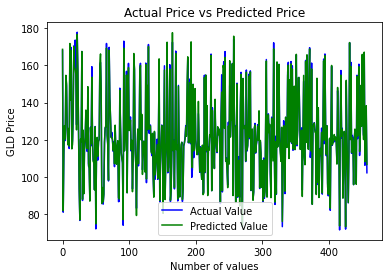

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

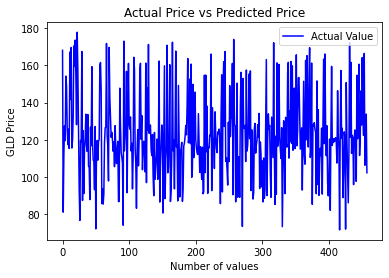

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()